# Charakterisierung von Straßennetzen - Lasse @ MPIDS

## Welche Daten kriegen wir aus einer OSM-Karte?

Wir arbeiten mit Modellen von Straßennetzen, aber auch mit echten. In den Julia Simulationen hast du schon Straßennetze auf Basis von [openstreetmap](https://www.openstreetmap.de/) benutzt.
Um mit OSM-Straßennetzen zu arbeiten, gibt es für Python das Paket [OSMnx](https://osmnx.readthedocs.io/en/stable/)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

Laden wir eine Karte mit OSMnx und plotten sie:

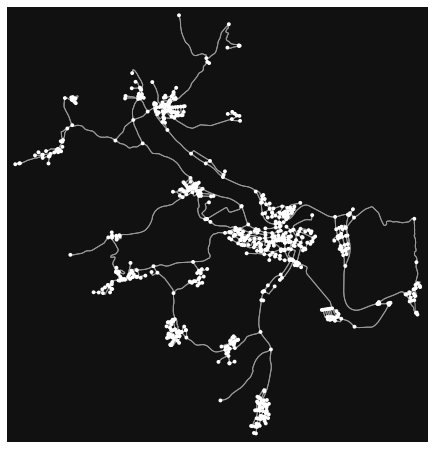

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [48]:
place = "Witzenhausen"
G = ox.graph_from_place(place, network_type='drive')
ox.plot_graph(G)

In [40]:
G.number_of_nodes()

745

Für viele Straßen beinhaltet OSM das Tempolimit ``maxspeed``. OSMnx kann fehlende Geschwindigkeiten ergänzen:

In [41]:
ox.add_edge_speeds(G)

Jetzt finden wir das neue Attribut ``speed_kph`` für die Straßensegmente:

In [42]:
list(list(G.edges(data=True))[0][-1].keys())

['osmid', 'name', 'highway', 'oneway', 'length', 'speed_kph']

Plotten wir die Karte nochmal, diesmal mit den Geschwindigkeiten durch Farben repräsentiert:

(Idee: Andere Eigenschaften von Nodes/Edges plotten)

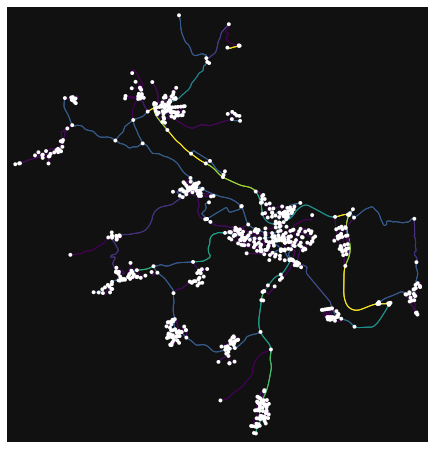

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [43]:
colors = ox.plot.get_edge_colors_by_attr(G, 'speed_kph')
ox.plot_graph(G, edge_color=colors)

Ein typisches Problem auf Netzwerken ist das finden von kürzesten Pfaden zwischen zwei Nodes (=Kreuzungen in diesem Fall). Das kann OSMnx auch:

In [44]:
# wähle zwei zufällige nodes
start = np.random.choice(G.nodes)
ziel = np.random.choice(G.nodes)

# zunächst nach kürzester Strecke
Route1 = ox.shortest_path(G, start, ziel, weight='length')

# dann nach kürzester Zeit - dafür müssen wir die Fahrtzeiten erst berechnen
ox.add_edge_travel_times(G)
Route2 = ox.shortest_path(G, start, ziel, weight='travel_time')

Jetzt visualisieren wir die beiden Routen - sind sie unterschiedlich?

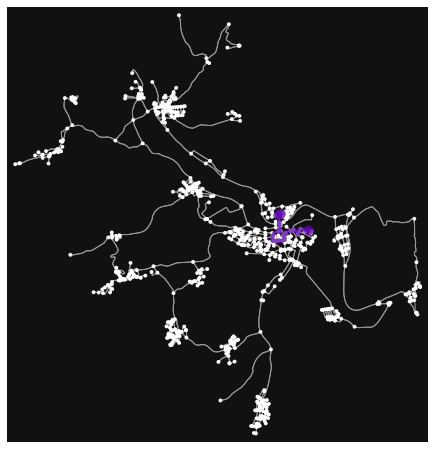

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [45]:
ox.plot_graph_routes(G, [Route1, Route2], route_colors=['r', 'b'])

Die größte Länge eines kürzesten Pfades heißt Durchmesser des Netzwerkes:

In [46]:
time_diameter = []
for n, ddict in nx.shortest_path_length(G, weight='travel_time'):
    time_diameter += list(ddict.values())
time_diameter = np.amax(time_diameter)
print("Der zeitliche Durchmesser ist: {} Sekunden".format(time_diameter))

Der zeitliche Durchmesser ist: 1328.3000000000002 Sekunden


Das gleiche für den "Längendurchmesser":

## Ideen für Dinge, die du noch ausprobieren könntest:
- Einbahnstraßen anzeigen (`oneway` Attribut von edges)
- Den `network_type` beim Laden des Netzwerkes variieren.
- 